 # Lecture 5: Conjugate Families
 
 ## Instructor: Dr. Hu Chuan-Peng  


## 回顾对先验的选择

在lec3 与 lec4 中，我们使用了Beta分布来反映我们对参数$\pi$的先验认识。

我们知道若先验可以用$Beta(\alpha,\beta)$描述，收集到的数据可以用$Bin(n, \pi)$描述，后验分布就可以用$Beta(\alpha+y, \beta+n-y)$描述

在lec3中，我们介绍过共轭先验的概念(conjugate prior):

* 如果后验分布与先验分布属于同类，先验分布被称为似然函数的共轭先验

事实上，Beta-Binomial分布这类先验-数据组合，被称为共轭家族(conjugate family)，利用这些家族来获得后验，既有计算上的便利性，由于我们明确知道后验的分布类型，解释起来也很容易。

**非共轭先验会带来什么**

让我们再回到纣王支持率的例子，考虑一个非共轭先验的状况

假如此时的先验分布$f(\pi)$不是$beta$分布，而是以下形式：
$$
\begin{equation}
f(\pi)=e-e^\pi\; \text{ for } \pi \in [0,1].
\tag{5.1}
\end{equation}
$$

![](https://www.bayesrulesbook.com/bookdown_files/figure-html/non-conjugate-1.png)



> 在有共轭先验$Beta(45,55)$的情况下，后验分布可以简洁地写为$Beta(75,75)$  
> 但在非共轭先验的情况下，该后验分布的结果变得很繁琐。   
> 并且在非共轭先验的情况下，我们很难从这个后验表达式中获得类似的直觉。   


假设我们在50人的投票结果中观察到10人投了支持票，那么似然函数仍是一个二项分布，可以写成：
$$
L(\pi | y=10) = \left(\!\begin{array}{c} 50 \\ 10 \end{array}\!\right) \pi^{10} (1-\pi)^{40} \; \; \text{ for } \pi \in [0,1]
$$

后验可以写成：
$$
f(\pi | y = 10) \propto f(\pi) L(\pi | y = 10) = (e-e^\pi) \cdot \binom{50}{10} \pi^{10} (1-\pi)^{40}.
$$

加入归一化常数后：

$$
\begin{equation}
f(\pi|y=10)= \frac{(e-e^\pi)  \pi^{10} (1-\pi)^{40}}{\int_0^1(e-e^\pi)  \pi^{10} (1-\pi)^{40}d\pi}  \; \; \text{ for } \pi \in [0,1].
\tag{5.2}
\end{equation}
$$

## Gamma-Poisson conjugate family

### The Poisson data model

**例子：亚运会中国每天获得金牌的数量**：🤔我们该使用哪种分布来描述下面这个例子？

假设一位体育爱好者每天都会查询中国在亚运会期间每天获得金牌的数量。

她觉得平均下来，中国每天会获得12枚金牌，并且这个数字大概在5-20之间波动

我们假设中国每天会获得金牌的**平均数量**设为$\lambda$
> 请注意一些新的希腊字母：λ = lambda

<iframe src="https://tiyu.baidu.com/major/home/%E6%9D%AD%E5%B7%9E%E4%BA%9A%E8%BF%90%E4%BC%9A/tab/%E5%A5%96%E7%89%8C%E6%A6%9C"></iframe>

**🤔我们该使用哪种分布来描述下面这个例子？**

需要注意的是，通常我们会：
1. 为$\lambda$选择一个合适的先验
2. 接着收集数据，并且选择一个合适的数据模型
3. 结合先验与数据，更新我们对$\lambda$的信念

在这一节中，为了方便探讨共轭先验，我们先从似然函数出发，然后再选取先验，最后讨论后验和共轭先验的关系。
- 我们需要先假定似然函数$L(\lambda|y)$是已知的
- 再去选取一个合适的先验分布$p(\lambda)$
- 最后使得后验分布与先验分布具有相同的数学形式。

假设$\lambda$是已知的，接下来我们对中国每天会获得金牌的数量$(Y_1,Y_2,\ldots,Y_n)$进行估计

$$  
f(Y_n|\lambda)
$$

> * 注意，在这里，我们并不能使用二项模型来描述事件的分布情况
> * 在二项模型中，我们需要有事件重复的总次数n，和事件成功发生的概率p
>$$ f(y|\pi) = P(Y=y | \pi) = \binom{n}{y} \pi^y (1-\pi)^{n-y}  $$  
> * 在这里，我们已知的是$\lambda$，即每天会获得金牌的平均数量

**Poisson分布**  


我们可以使用 **泊松分布(Poisson distribution)** 来表示在给定$\lambda$下，中国每天会获得金牌在不同数量下的概率

**Poisson分布**的概率质量函数(pmf)可以表示为：

$$f(y) =  \frac{\lambda^{y}e^{-\lambda}}{y!}$$

* Poisson分布只有一个参数$\lambda$，表示事情发生平均发生率(event rate)或事件发生的期望次数。
* y是数据，指在一定时间间隔中事件发生的次数。
* $f(y)$表示在某单位时间内，某事件y发生的平均次数的概率。 
* 例如，已知中国每天平均会获得12枚金牌($\lambda=12$), 那么中国队明天获得5枚金牌(y=5)的概率为 $f(y)=0.1$小于明天获得13枚金牌(y=13)的概率为 $f(y)=0.3$。

----

> poisson分布对数据做出的假设：
> * 事件发生比率($\lambda$)是常数
> * 事件的发生是相互独立的

在这个例子中，中国每天会获得金牌的平均数量是固定的，并且前一天获得金牌的数量不会影响后一天获得金牌的数量

**Poisson分布图示**

下图展示了不同$\lambda$下，事件发生y次的可能性分布

In [1]:
# @title setup
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import gamma
from ipywidgets import interact
from matplotlib.lines import Line2D
import seaborn as sns


In [2]:
y = np.linspace(0, 25, 26)  # 假设明天获得金牌的平均数量 0到25次
λ = 12                      # 假设每天平均获得12枚金牌
st.poisson.pmf(y, λ)

array([6.14421235e-06, 7.37305482e-05, 4.42383289e-04, 1.76953316e-03,
       5.30859947e-03, 1.27406387e-02, 2.54812775e-02, 4.36821900e-02,
       6.55232849e-02, 8.73643799e-02, 1.04837256e-01, 1.14367916e-01,
       1.14367916e-01])

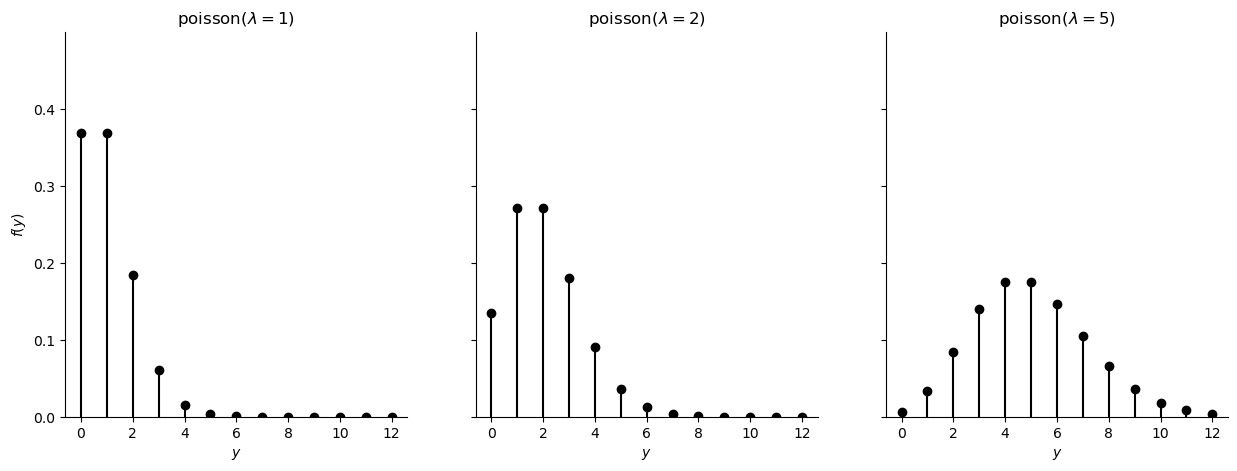

In [5]:
y = np.linspace(0, 25, 26)        # 假设明天获得金牌的平均数量 0到25次

λs = [5,10,15]                      # 生成三种每天获得枚金牌平均数量 lambda

fig, axes = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)   # 生成三个子图

for i,λ in enumerate(λs):
    y_p = st.poisson.pmf(y,λ)     # 在给定λ下，y发生的概率
    axes[i].stem(y,y_p,           # 画图
                 linefmt='black',
                 bottom=-1)
    axes[i].set_title(f"poisson($\lambda=${λ})")  # 设置标题
    axes[i].set_xlabel('$y$')                     # 设置x轴标题


axes[0].set_ylabel('$f(y)$')                      # 设置y轴标题
plt.ylim(0, 0.5)                                  # 设置y轴范围
plt.yticks(np.arange(0, 0.5, 0.1))                # 设置y轴刻度
sns.despine()

**计算Poisson的似然函数**  


🤔如果我们一共获得了四天的数据，此时的似然函数怎么写？

我们将四天内中国获得的金牌数量$(Y_1, Y_2, \ldots, Y_n)$组合为一个向量$\vec{y} = (y_1,y_2,\ldots,y_n)$

在给定的$\lambda$下，$\vec{y}$发生的可能性可以表示为：

$$
f(\vec{y} | \lambda) = \prod_{i=1}^n f(y_i | \lambda) = f(y_1 | \lambda) \cdot f(y_2 | \lambda) \cdot \cdots \cdot f(y_n | \lambda) 
$$

> 注意：由于每天获得金牌的数量是互不影响的，所以我们可以直接相乘：$P(A \cap B) = P(A)P(B)$

------

我们可以把公式代入并进行整理，最后可得到

$$
\begin{split}
f(\vec{y} | \lambda) =\frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \\
\end{split}
$$

当n很大时，$\prod y_i!$的计算将变得麻烦，同样的我们可以暂时忽略分母

$$
L(\lambda | \vec{y}) = \frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \propto \lambda^{\sum y_i}e^{-n\lambda} \;\; \text{ for } \lambda > 0
$$


---------------

**具体计算**

$$
\begin{split}
f(\vec{y} | \lambda) 
& = \frac{\lambda^{y_1}e^{-\lambda}}{y_1!} \cdot \frac{\lambda^{y_2}e^{-\lambda}}{y_2!} \cdots \frac{\lambda^{y_n}e^{-\lambda}}{y_n!} \\
& = \frac{\left[\lambda^{y_1}\lambda^{y_2} \cdots \lambda^{y_n}\right] \left[e^{-\lambda}e^{-\lambda} \cdots e^{-\lambda}\right]}{y_1! y_2! \cdots y_n!} \\
& =\frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \\
\end{split}
$$

-----------------


**代入具体数据**

假设四天内中国获得金牌的数量分别是20，13，13，8，我们可以将其组合成一个向量$\vec{y} = (y_1,y_2,y_3,y_4) = (20，13，13，8)$

代入公式：
$$
L(\lambda | \vec{y}) = \frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \;\;\;\;\;\;\;\;\;\sum_{i=1}^4y_i = 6 + 2 + 2 + 1 = 11
$$

可得：
$$
L(\lambda | \vec{y}) = \frac{\lambda^{11}e^{-4\lambda}}{6!\times2!\times2!\times1!} \propto \lambda^{11}e^{-4\lambda} \;\;\;\; \text{ for } \lambda > 0 
$$

此时，输入不同的参数$\lambda$，就可以计算得到对应参数的似然值。

首先，我们尝试绘制数据的频率分布图，以确定数据的形态。

其次，我们假设中国每天平均获得12枚金牌($\lambda=12$)，并尝试计算对应数据的似然值。

In [ ]:
# 绘制数据的分布

#------------------------------------------------
#                你可以更改以下数据，体会不同数据形成的分布，例如 observed_data = [3,3,2,2,2,1,...]
#------------------------------------------------
observed_data = [20,13,13,8]   # 假设连续四天接到的诈骗电话的数量

plt.hist(observed_data)
plt.title('Histogram of Observations')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')

In [ ]:
# 计算数据的似然 

#------------------------------------------------
#                你可以尝试不同的lambda 参数值
#------------------------------------------------
λ = 12 # 假设每天获得金牌的平均数量为12

print('The likelihood of observing the data given the parameter lambda is: ', st.poisson.pmf(observed_data,λ))

**Poisson似然函数图示**

如何画出Poisson的似然函数图？

- 我们需要横轴为不同的$\lambda$，纵轴为在不同的$\lambda$下，$\vec{y}$发生的似然$L(\lambda | \vec{y})$：

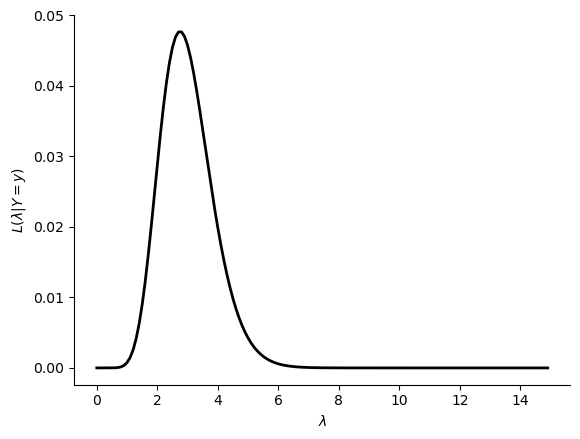

In [9]:
# 定义似然函数，由于该似然函数不能通过调用已有的函数获得，因此我们根据得到的公式定义一个

def poisson_likelihood(y):
    lambdas = np.arange(0, 25, 0.1)
    
    # Calculate the Poisson likelihood for each lambda
    likelihood_values = np.exp(-len(y) * lambdas) * np.power(lambdas, np.sum(y)) / np.prod([np.math.factorial(val) for val in y])

    return lambdas, likelihood_values

#传入需要的参数vec y
observed_data = [20,13,13,8]
lambdas, likelihood_values = poisson_likelihood(observed_data)
likelihood_values /= np.sum(likelihood_values)

plt.plot(lambdas, likelihood_values, color='black', lw=2)
plt.xlabel('$\lambda$')
plt.ylabel('$L(\lambda | Y=y)$')
sns.despine()

###  Potential priors

**🤔思考：**

在之前的例子中，我们主要关注泊松分布相关的似然函数，而忽略了参数$\lambda$的先验分布。
$$
L(\lambda | \vec{y}) = \frac{\lambda^{\sum y_i}e^{-n\lambda}}{\prod_{i=1}^n y_i!} \propto \lambda^{11}e^{-4\lambda}
$$


请根据公式的形态猜测一下，以下哪种先验分布可以作为poisson似然的共轭先验？？

1. Gamma模型：$f(\lambda) \propto \lambda^{s - 1} e^{-r \lambda}$

2. Weibull模型：$f(\lambda) \propto \lambda^{s - 1} e^{(-r \lambda)^s}$

3. "F"模型：$f(\lambda) \propto \lambda^{\frac{s}{2} - 1}\left( 1 + \lambda\right)^{-s}$



### Gamma prior

考虑到 $\lambda$ 是一个可以取任何正值的连续变量。

我们可以使用Gamma分布对它进行模拟，以此作为$\lambda$的先验分布。

$$\lambda \sim \text{Gamma}(s, r)$$

Gamma分布由两个参数指定：
- 形状参数（shape parameter）或称为尺度形状参数（scale shape parameter）, 一般用 s 或者 $\alpha$ 表示。它是一个正实数，控制着Gamma分布的形状。较大的s值使得分布更加陡峭，而较小的s值使得分布更加平坦。
- 尺度参数（scale parameter）或称为逆尺度参数（inverse scale parameter），一般用 r 或者 $\beta$ 表示。它也是一个正实数，控制着Gamma分布的尺度。较大的r值使得分布的尺度变大，而较小的r值使得分布的尺度变小。

![](https://img-blog.csdnimg.cn/20200129203329912.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzM3OTQ4ODY2,size_16,color_FFFFFF,t_70)
> source: https://www.mbbpxt.co/gamma%E5%88%86%E5%B8%83/

其pdf为：
$$
f(\lambda) = \frac{r^s}{\Gamma(s)} \lambda^{s-1} e^{-r\lambda} \;\; \text{ for } \lambda > 0.
$$

In [ ]:
#pip install ipywidgets

In [11]:
# @title interactive gamma
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import gamma
from ipywidgets import interact
import seaborn as sns


x = np.linspace(0, 20, 1000)
def plot_beta(a, b):
    y = gamma.pdf(x, a=a, scale=1/b)
    plt.plot(x, y, color='black', lw=2)
    plt.title(f"Gamma({a}, {b})")
    plt.xlabel('$\lambda$')
    plt.ylabel('$f(\lambda)$')
    plt.gca().yaxis.set_major_formatter('{x:1.1f}')
    plt.xlim(0, 8)
    plt.xticks(np.arange(0, 9, 2))
    plt.yticks(np.arange(0, 2.5, 0.5))
    sns.despine()

In [12]:
ipywidgets.interact(plot_beta, a=(0, 10), b=(0, 10))

interactive(children=(IntSlider(value=5, description='a', max=10), IntSlider(value=5, description='b', max=10)…

<function __main__.plot_beta(a, b)>

已知$\lambda$的平均值为12，我们选用$\lambda \sim \text{Gamma}(24,2)$作为$\lambda$的先验

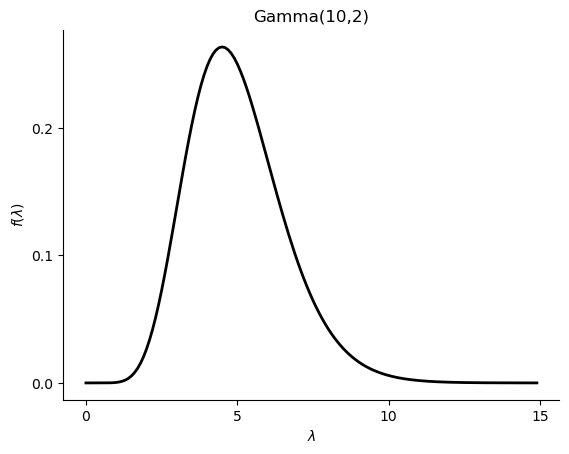

In [23]:
x = np.arange(0, 15, 0.1)
prior_y = st.gamma.pdf(x, a=10, scale=1/2)
plt.plot(x, prior_y, color='black', lw=2)
plt.title(f"Gamma(10,2)")
plt.xlabel('$\lambda$')
plt.ylabel('$f(\lambda)$')
plt.gca().yaxis.set_major_formatter('{x:1.1f}')
plt.xticks(np.arange(0, 16, 5))
plt.yticks(np.arange(0, 0.3, 0.1))
sns.despine()

### Gamma-Poisson conjugacy
由于Gamma先验分布和Poisson似然来自一组共轭家族，既二者组成的后验分布同样也是Gamma分布，具有计算上的便利性，因此我们可以直接代入公式来计算后验：

- Gamma-Poisson 家族的公式表达：
> $先验：\lambda \sim \text{Gamma}(s, r) \\
似然：Y_i | \lambda \stackrel{ind}{\sim} \text{Pois}(\lambda) \\
后验：\lambda|\vec{y} \; \sim \; \text{Gamma}\left(s + \sum y_i, \; r + n\right)$

- 代入当前数据可得：
> $先验：\lambda \sim \text{Gamma}(24, 2)$

> $\vec{y} = (y_1,y_2,y_3,y_4) = (20,13,13,8); \;\;\;\; $

> $似然：L(\lambda | \vec{y}) = \frac{\lambda^{54}e^{-48\lambda}}{20!\times13!\times13!\times8!} \propto \lambda^{54}e^{-48\lambda}$

> $s + \sum y_i = 24 + 54; \;\;\;\; r + n = 2 + 4 \\
后验：\lambda|\vec{y} \; \sim \; \text{Gamma}(78,6)$


我们可以将这三者画出来：

在收集了四天的数据后，我们对$\lambda$的信念发生了更新，

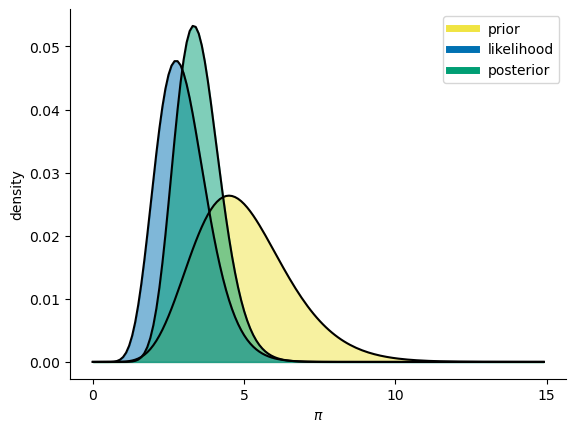

In [33]:
x = np.arange(0, 25, 0.1)
prior_y = st.gamma.pdf(x, a=24, scale=1/2) / np.sum(st.gamma.pdf(x, a=24, scale=1/2))
posterior = st.gamma.pdf(x, a=78, scale=1/6) / np.sum(st.gamma.pdf(x, a=78, scale=1/6))

observed_data = [20,13,13,8]
lambdas, likelihood_values = poisson_likelihood(observed_data)

likelihood_values /= likelihood_values.sum()

plt.plot(x, prior_y, color='black')
plt.fill_between(x, prior_y, color="#f0e442", alpha=0.5)
plt.plot(lambdas, likelihood_values, color='black')
plt.fill_between(lambdas, likelihood_values, color="#0071b2", alpha=0.5)
plt.plot(x, posterior, color='black')
plt.xticks(np.arange(0, 16, 5))
plt.fill_between(x, posterior, color="#009e74", alpha=0.5)

# 设置 x 和 y 轴标签
plt.xlabel('$\lambda$')
plt.ylabel('density')

# 创建自定义图例
custom_lines = [Line2D([], [], color="#f0e442", lw=5),
                Line2D([], [], color="#0071b2", lw=5),
                Line2D([], [], color="#009e74", lw=5)]
        
# 将图例放置在子图外部的右上角
plt.legend(custom_lines, ['prior', 'likelihood', 'posterior'], loc='upper right', bbox_to_anchor=(1, 1))

# 移除图的上、右边框线
sns.despine()

**扩展**

除了 Gamma分布外，Poisson分布的共轭先验还包括 Negative Binomial分布:

$$\begin{align*}
Gamma: & f(\lambda) \propto \lambda^{s - 1} e^{-r \lambda} \\
Negative-binomial: & P(X = k) = (k + r - 1) C (k) * p^k * (1 - p)^r
\end{align*}
$$

然而，Weibull模型和"F"模型不是Poisson分布的共轭先验：

$$\begin{align*}
Weibull模型：& f(\lambda) \propto \lambda^{s - 1} e^{(-r \lambda)^s} \\
F模型：& f(\lambda) \propto \lambda^{\frac{s}{2} - 1}\left( 1 + \lambda\right)^{-s}
\end{align*}
$$

## Normal-Normal conjugate family

我们已经学习了两个共轭族：Beta-Binomial 和 Gamma-Poisson。

但还有更多的共轭族存在！最常见的就是：Normal-Normal。

**来看一个经典的例子：身高分布**

国家卫健委：2020年我国18-44岁成年人平均身高为165厘米。随着生成质量的提高，我们有理由相信，这一数据有所提高，所以我们打算新收集一万名被试(n=10000)的身高数据，并使用正态-正态贝叶斯模型来估计**根据数据更新后**的平均身高。

![](https://th.bing.com/th/id/OIP.fdUphNKKkEvn9msoc8VRFwHaE8?pid=ImgDet&rs=1)

> source: https://baijiahao.baidu.com/s?id=1736757271631341254&wfr=spider&for=pc

### The Normal data model

同样，我们的贝叶斯分析也是从对平均身高(μ)的先验开始。
然而，要为μ指定一个适当的先验模型结构，需要考虑数据(Yi)的特征。

由于身高 Yi 是连续数据，因此有很多潜在可能的模型：贝塔模型、指数模型、伽马模型、正态分布模型、F 模型等。
- 从这个列表中，我们可以立即排除贝塔模型。因为它假设 Yi ∈ [0，1]，而身高往往在 165cm 左右。
- 在剩下的选项中，正态模型是相当合理的。这也是我们直觉上的第一反应，毕竟身高通常围绕某个总体平均值（μ）呈现为对称或正态分布。

**正态模型介绍** 

假设 Y 是一个连续随机变量，可以取 -∞ 和 ∞ 之间的任意值，即 Y∈ (-∞, ∞)。

那么，Y 的变异性可以很好地用均值参数 μ∈ (-∞, ∞) 和标准差参数 σ > 0 的正态模型来表示：

$$
Y \sim N(\mu, \sigma^2).
$$

正态模型的连续 pdf 形式:

$$
\begin{equation}
f(y) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\bigg[{-\frac{(y-\mu)^2}{2\sigma^2}}\bigg] \;\; \text{ for } y \in (-\infty,\infty)
\tag{5.11}
\end{equation}
$$

正太模型的基本特征：

$$
\begin{split}
E(Y) & = \text{ Mode}(Y) = \mu \\
\text{Var}(Y) & = \sigma^2 \\
\text{SD}(Y) & = \sigma. \\
\end{split}
$$

> 此外，大家都知道的，大约 95% 的 Y 值都在 μ 的 2 个标准差范围内。

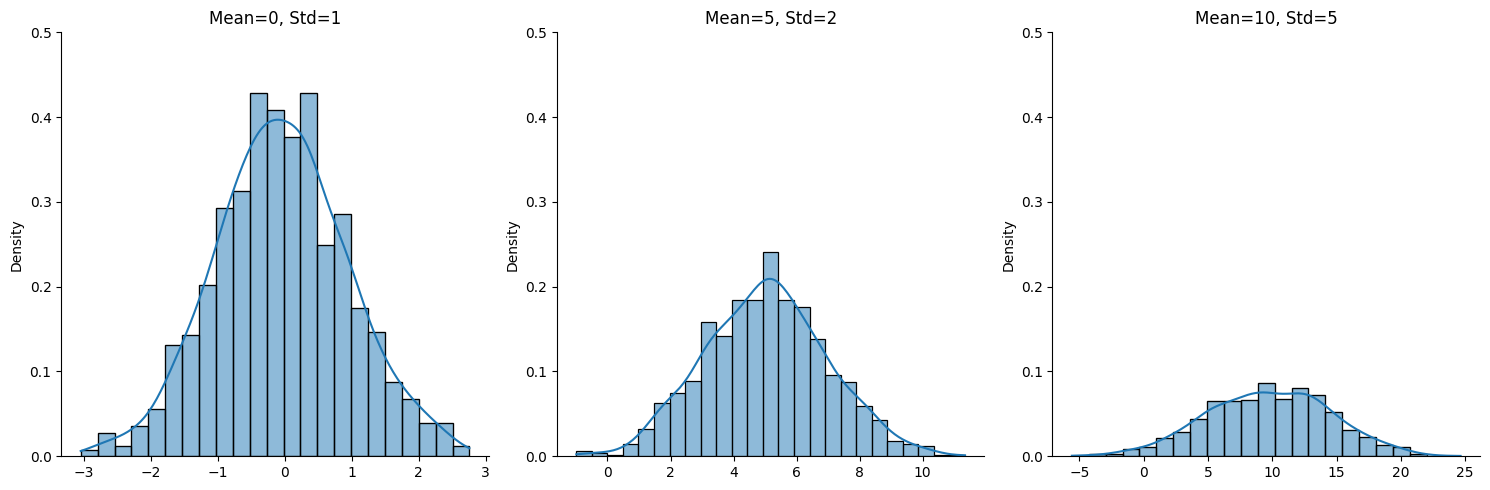

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建数据
import numpy as np
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=5, scale=2, size=1000)
data3 = np.random.normal(loc=10, scale=5, size=1000)

# 绘制图形
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个图
sns.histplot(data=data1, kde=True, ax=axes[0], stat = 'density')
axes[0].set_title('Mean=0, Std=1')
axes[0].set_ylim([0, 0.5])

# 绘制第二个图
sns.histplot(data=data2, kde=True, ax=axes[1], stat = 'density')
axes[1].set_title('Mean=5, Std=2')
axes[1].set_ylim([0, 0.5])

# 绘制第三个图
sns.histplot(data=data3, kde=True, ax=axes[2], stat = 'density')
axes[2].set_title('Mean=10, Std=5')
axes[2].set_ylim([0, 0.5])

# 显示图形
plt.tight_layout()
# 移除图的上、右边框线
sns.despine()

上图展示了各种平均值和标准差参数值 μ 和 σ 下的正态模型。

- 无论参数如何变化，正态模型都呈钟形，并围绕 μ 对称
- 因此，当 μ 变大时，模型也会随之向右移动。
- 此外，σ 控制着正态模型的变异性--σ 越大，模型越分散。
- 最后，虽然正态变量 Y 的取值范围可以从-∞到∞，但如果 Y 值与均值 μ 的差值超过 3 个标准差 σ，则正态模型赋予 Y 值的可信度可以忽略不计。

**Normal data model**

回到我们的例子，我们假设收集了 n = 10000 名被试的身高（Y1, Y2, ... , Yn）
- 这些被试的身高显然是彼此独立的，
- 并且围绕平均身高 µ 的正态分布，标准偏差为 σ。
- 此外为了保持对 µ 的关注，我们将在整个分析过程中的标准偏差固定为 σ = 5 cm。3 σ 的范围表明，大多数人的身高在 150 cm 到 180 cm 之间。
- 因此，10000 名被试的身高的均值为 168cm，标准差为 5cm。 显然，相比于 2020 年的数据 165cm，现在的数据 168cm 体现了大众身高的增长。

接着我们可以定义出正态模型的似然函数：

$$
L(\mu |\vec{y}) \propto \prod_{i=1}^{n} \exp\bigg[{-\frac{(y_i-\mu)^2}{2\sigma^2}}\bigg] =  \exp\bigg[{-\frac{\sum_{i=1}^n(y_i-\mu)^2}{2\sigma^2}}\bigg]  .
$$



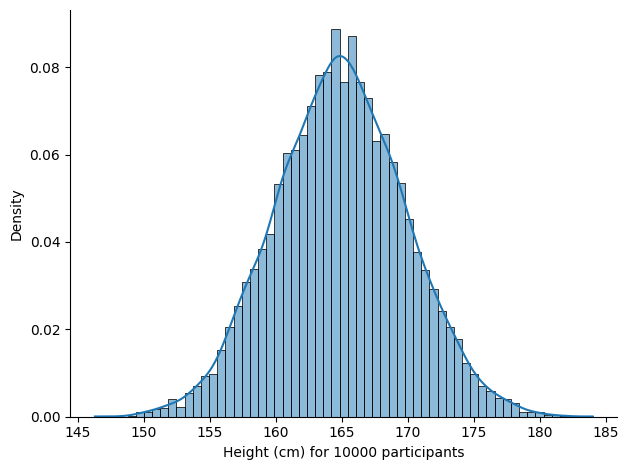

In [10]:
# 模拟10000名被试身高的数据并绘图

# 创建数据
np.random.seed(0)
data = np.random.normal(loc=168, scale=5, size=10000)

# 绘图
sns.histplot(data=data, kde=True, stat = 'density')

plt.xlabel('Height (cm) for 10000 participants')
# 显示图形
plt.tight_layout()
# 移除图的上、右边框线
sns.despine()

### Normal prior

根据2020年之前的数据，我们可以用 165cm 作为我们正态先验模型的均值，即 µ = 165。

具体来说，我们假设 μ 本身是围绕某个均值 θ 和标准差 τ 的正态分布 (其中， θ 和 τ是超参)：

$$
\begin{align*}
\mu & \sim N(\theta, \tau^2) \\
f(\mu) & = \frac{1}{\sqrt{2\pi\tau^2}} \exp\bigg[{-\frac{(\mu - \theta)^2}{2\tau^2}}\bigg] \;\; \text{ for } \mu \in (-\infty,\infty)
\tag{5.14}
\end{align*}
$$

注意👁️，正态先验假设 μ∈（-∞，∞）与我们对数据模型的假设一致，我们还将在后面证明这是一个共轭先验。因为两个模型都正比于该项：

$$
\exp\bigg[{-\frac{(\mu - \blacksquare)^2}{2\blacksquare^2}}\bigg]
$$

> 先验模型和数据模型的差异仅表现为均值的差异，即先验模型的均值为 165cm，而数据模型的均值为 168cm。

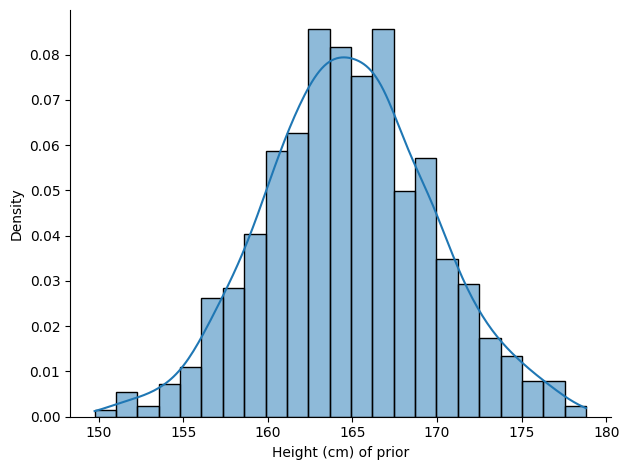

In [11]:
# 绘制先验

# 创建数据
np.random.seed(0)
data = np.random.normal(loc=165, scale=5, size=1000)

# 绘图
sns.histplot(data=data, kde=True, stat = 'density')

plt.xlabel('Height (cm) of prior')
# 显示图形
plt.tight_layout()
# 移除图的上、右边框线
sns.despine()

### Normal-Normal conjugacy

为了得到 μ 的后验模型，我们必须将先验模型和数据信息结合起来。

> 需要强调的是，我们选择的正态先验模型属于正态-正态的共轭族！因此，μ 的后验模型也将是正态的，并根据先验数据和观测数据更新参数。

以下公式展示了μ的后验模型：
$$
\begin{split}
Y_i | \mu & \stackrel{ind}{\sim} N(\mu, \sigma^2) \\
\mu & \sim N(\theta, \tau^2) \\
\mu|\vec{y} \; & \sim \;  N\bigg(\theta\frac{\sigma^2}{n\tau^2+\sigma^2} + \bar{y}\frac{n\tau^2}{n\tau^2+\sigma^2}, \; \frac{\tau^2\sigma^2}{n\tau^2+\sigma^2}\bigg)  .
\tag{5.15}
\end{split}
$$

首先，后验均值是先验均值 E(μ) = θ 和样本均值 y 的加权平均值；

$$
\text{posterior mean} \sim \theta\frac{\sigma^2}{n\tau^2+\sigma^2} + \bar{y}\frac{n\tau^2}{n\tau^2+\sigma^2}
$$

其次，后验方差受先验变异性 τ 和数据变异性 σ 的影响：

$$
\text{posterior variance}~\frac{\tau^2\sigma^2}{n\tau^2+\sigma^2}
$$

两者都受到样本量n的影响。
- 首先，随着n的增加，后验均值对先验均值的权重减少，对样本均值y的权重增加: $\frac{\sigma^2}{n\tau^2+\sigma^2} \to 0 \;\; \text{ and } \;\;\frac{n\tau^2}{n\tau^2+\sigma^2} \to 1 .$
- 此外，随着 n 的增大，后验方差会减小 $\frac{\tau^2\sigma^2}{n\tau^2+\sigma^2} \to 0$
- 也就是说，我们掌握的数据越多，我们对 μ 的后验确定性就越高，也就越与数据的结果相似。

结合之前的先验模型和数据模型，现在我们可以来计算后验并绘制它。

- 先验模型假设全国成人的平均身高为 165cm，标准偏差为 5cm。
- 数据模型为 10000 名被试的身高数据，平均身高为 168cm，标准偏差为 5cm。

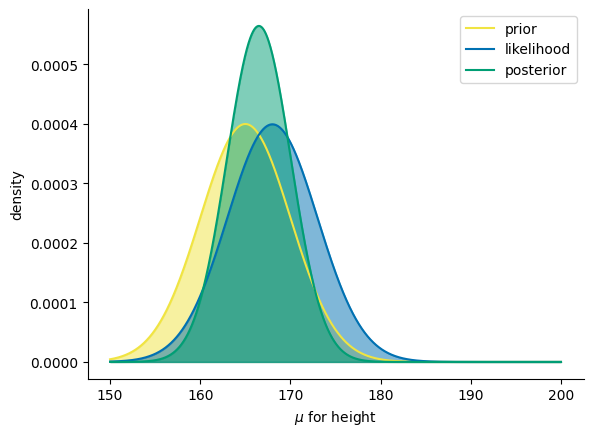

In [36]:

# 定义身高范围
x = np.linspace(150, 200, 10000)

# 定义先验分布
prior_mean = 165
prior_std = 5
prior_y = st.norm.pdf(x, loc = prior_mean, scale = prior_std) / np.sum(st.norm.pdf(x, prior_mean, prior_std))

# 生成似然
likelihood_mean = 168
likelihood_std = 5
likelihood_values = st.norm.pdf(x, loc = likelihood_mean, scale = likelihood_std) / np.sum(st.norm.pdf(x, likelihood_mean, likelihood_std))

# 计算后验分布
posterior_mean = (prior_mean * prior_std**2 + likelihood_mean * likelihood_std**2) / (prior_std**2 + likelihood_std**2)
posterior_std = np.sqrt((prior_std**2 * likelihood_std**2) / (prior_std**2 + likelihood_std**2))
posterior = st.norm.pdf(x, loc = posterior_mean, scale = posterior_std) / np.sum(st.norm.pdf(x, posterior_mean, posterior_std))


plt.plot(x, prior_y, color='#f0e442', label="prior")
plt.fill_between(x, prior_y, color="#f0e442", alpha=0.5)
plt.plot(x, likelihood_values, color='#0071b2', label="likelihood")
plt.fill_between(x, observed_data, color="#0071b2", alpha=0.5)
plt.plot(x, posterior, color='#009e74', label="posterior")
plt.fill_between(x, posterior, color="#009e74", alpha=0.5)

# 设置 x 和 y 轴标签
plt.xlabel('$\mu$ for height')
plt.ylabel('density')
plt.legend()

# 移除图的上、右边框线
sns.despine()

In [34]:
print(f"后验分布的均值：{posterior_mean}。 介于先验和似然之间。")

后验分布的均值：166.5。 介于先验和似然之间。


至此，我们完成了对正态-正态模型的后验分布的估计。


**扩展阅读：证明 Normal-Normal conjugacy**

为完整起见，我们在此证明正态-正态模型产生后验模型。如果你不喜欢推导，也没关系。请随意跳到下一节。

让我们直接进入正题。μ 的后验 pdf 与正态先验 pdf 和似然函数 的乘积成正比。对于 μ∈ (-∞, ∞)：
$$
f(\mu|\vec{y}) \propto f(\mu)L(\mu|\vec{y}) \propto \exp\bigg[{\frac{-(\mu - \theta)^2}{2\tau^2}}\bigg] \cdot \exp\bigg[{-\frac{(\bar{y}-\mu)^2}{2\sigma^2/n}}\bigg]  .
$$

接下来，我们可以展开指数中的平方，包括第一个指数分子中的$\theta^2$ 和第二个指数分子中的 $y^2$：
$$
\begin{split}
f(\mu|\vec{y}) 
& \propto  \exp\Bigg[{\frac{-\mu^2+2\mu\theta-\theta^2}{2\tau^2}}\Bigg]\exp\Bigg[{\frac{-\mu^2+2\mu\bar{y}-\bar{y}^2}{2\sigma^2/n}}\Bigg] \\
& \propto  \exp\Bigg[{\frac{-\mu^2+2\mu\theta}{2\tau^2}}\Bigg]\exp\Bigg[{\frac{-\mu^2+2\mu\bar{y}}{2\sigma^2/n}}\Bigg]. \\
\end{split}
$$

我们给出指数的共同分母，并将它们合并成一个指数：
$$
\begin{split}
f(\mu|\vec{y}) 
& \propto  \exp\Bigg[{\frac{(-\mu^2+2\mu\theta)\sigma^2/n}{2\tau^2\sigma^2/n}}\Bigg]\exp\Bigg[{\frac{(-\mu^2+2\mu\bar{y})\tau^2}{2\tau^2\sigma^2/n}}\Bigg] \\
& \propto  \exp\Bigg[{\frac{(-\mu^2+2\mu\theta)\sigma^2 +(-\mu^2+2\mu\bar{y})n\tau^2}{2\tau^2\sigma^2}}\Bigg]. \\
\end{split}
$$

现在，让我们把 μ 项合并起来，重新排列，这样 $\mu^2$ 就是：
$$
\begin{split}
f(\mu|\vec{y}) 
& \propto  \exp\Bigg[{\frac{-\mu^2(n\tau^2+\sigma^2)+2\mu(\theta\sigma^2+ \bar{y}n\tau^2) }{2\tau^2\sigma^2}}\Bigg] \\
& \propto  \exp\Bigg[{\frac{-\mu^2+2\mu\left(\frac{\theta\sigma^2 + \bar{y}n\tau^2}{n\tau^2+\sigma^2}\right) }{2(\tau^2\sigma^2) /(n\tau^2+\sigma^2)}}\Bigg]. \\
\end{split}
$$

仔细观察，你会发现我们可以带回一些不依赖于 μ 的常数来完成分子中的平方：
$$
\begin{split}
f(\mu|\vec{y}) 
& \propto  \exp\Bigg[{\frac{-\bigg(\mu - \frac{\theta\sigma^2 + \bar{y}n\tau^2}{n\tau^2+\sigma^2}\bigg)^2 }{2(\tau^2\sigma^2) /(n\tau^2+\sigma^2)}}\Bigg]. \\
\end{split}
$$

这看起来仍然很混乱，但是一旦我们完成了正方形，我们实际上就得到了 μ 的正态 pdf 内核，即 exp部分。通过确定缺失的部分 ∎，我们可以得出以下结论
$$
\mu|\vec{y} \;  \sim  \; N\left(\frac{\theta\sigma^2+ \bar{y}n\tau^2}{n\tau^2+\sigma^2}, \;{\frac{\tau^2\sigma^2}{n\tau^2+\sigma^2}} \right)
$$

我们可以将后验均值重组为先验均值 μ 和数据均值 y 的加权平均值：
$$
\frac{\theta\sigma^2+ \bar{y}n\tau^2}{n\tau^2+\sigma^2} = \theta\frac{\sigma^2}{n\tau^2+\sigma^2} + \bar{y}\frac{n\tau^2}{n\tau^2+\sigma^2} .
$$



**Critiques of conjugate family models**

最后，我们补充一下共轭族模型的**缺点**

1. 共轭先验模型可能并不能适应你的先验信念。 
  - 例如，正态模型总是围绕均值 μ 对称。因此，如果你的先验认识不是对称的，那么正态先验模型可能就不适合作为先验。
2. 共轭族模型并不允许有一个完全平坦的先验(uniform prior)。
  - 虽然我们可以通过设置 α = β = 1 来使得 Beta 先验变得更加平坦，但无论是 Normal 还是 Gamma 先验（或任何具有无限支持的适当模型）都**无法调整为完全平坦**。
- 我们能做的最好的办法就是调整先验，使其具有非常高的方差，这样它们就几乎是平的了。

**练习**

在先前的示例中，我们将身高的标准差固定为5，这显然不符实实时。

在接下来的练习中，你可以尝试将标准差设置为不同的值，并观察结果的变化。

你练习的目标：
- 如何调整似然，使得后验均值接近更先验的均值？
- 如何调整似然，使得后验均值更接近后验的均值？

In [ ]:
# 定义身高范围
x = np.linspace(150, 200, 10000)

# 定义先验分布
prior_mean = 165
prior_std = 5

# 生成似然
#===========================================================================
#                            请调整似然，观察不同似然参数对于先验的影响。
#                            请修改 ... 中的值。
#===========================================================================
likelihood_mean = ...
likelihood_std = ...
likelihood_values = st.norm.pdf(x, loc = likelihood_mean, scale = likelihood_std) / np.sum(st.norm.pdf(x, likelihood_mean, likelihood_std))

#===========================================================================
#                            进阶：你可以尝试修改先验为不同分布，体验非共轭先验带来的影响 
#                            例如，将 norm 修改为 gamma，并修改对应的参数。(这里不做任何修改也可以运行)
#===========================================================================
prior_y = st.norm.pdf(x, loc = prior_mean, scale = prior_std) / np.sum(st.norm.pdf(x, prior_mean, prior_std))

# 计算后验分布
posterior_mean = (prior_mean * prior_std**2 + likelihood_mean * likelihood_std**2) / (prior_std**2 + likelihood_std**2)
posterior_std = np.sqrt((prior_std**2 * likelihood_std**2) / (prior_std**2 + likelihood_std**2))
posterior = st.norm.pdf(x, loc = posterior_mean, scale = posterior_std) / np.sum(st.norm.pdf(x, posterior_mean, posterior_std))


plt.plot(x, prior_y, color='#f0e442', label="prior")
plt.fill_between(x, prior_y, color="#f0e442", alpha=0.5)
plt.plot(x, likelihood_values, color='#0071b2', label="likelihood")
plt.fill_between(x, observed_data, color="#0071b2", alpha=0.5)
plt.plot(x, posterior, color='#009e74', label="posterior")
plt.fill_between(x, posterior, color="#009e74", alpha=0.5)

# 设置 x 和 y 轴标签
plt.xlabel('$\mu$ for height')
plt.ylabel('density')
plt.legend()

# 移除图的上、右边框线
sns.despine()